In [1]:
import pyclesperanto_prototype as cle
from numpy import random
from skimage.io import imshow

# Get a test label image

In [2]:
pointlist = cle.push_zyx(random.random((2,25)) * 100) 
print(pointlist)

[[97.74443    74.71837     5.8356853  84.4621     81.9602     33.652683
  94.964294    6.184415   29.13918    70.13291    19.460985   29.67493
  43.83282     4.4498754  34.391663   93.80245    12.285119   26.265379
  49.177452   99.19235    81.39957    25.975033   85.258644   52.3413
   0.15342467]
 [79.68927    22.554535   25.589256   68.65277    74.06416    23.58283
  45.808903   61.733257   34.74438    34.650608   54.740406   96.7702
  44.927395    5.688315   52.11122    42.138695    9.654919   61.481655
  74.067764   44.614067    4.991447   80.971054   54.04329    89.25805
  11.486275  ]]


c:\users\rober\miniconda3\lib\site-packages\pyopencl\__init__.py:252: CompilerWarning: Non-empty compiler output encountered. Set the environment variable PYOPENCL_COMPILER_OUTPUT=1 to see more.
  warn("Non-empty compiler output encountered. Set the "
c:\users\rober\miniconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)
c:\users\rober\miniconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


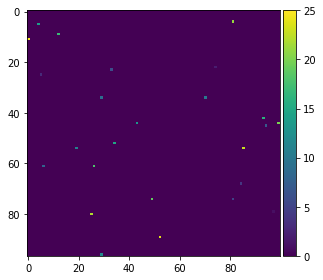

In [3]:
labelled_spots = cle.pointlist_to_labelled_spots(pointlist)
imshow(cle.pull_zyx(labelled_spots))

c:\users\rober\miniconda3\lib\site-packages\pyopencl\__init__.py:252: CompilerWarning: Non-empty compiler output encountered. Set the environment variable PYOPENCL_COMPILER_OUTPUT=1 to see more.
  warn("Non-empty compiler output encountered. Set the "


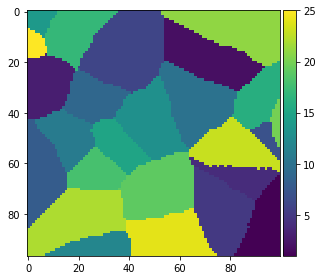

In [4]:
cells = cle.extend_labeling_via_voronoi(labelled_spots)
imshow(cle.pull_zyx(cells))

# Analyze and visualize distances between labelled objects

In [5]:
centroids = cle.label_centroids_to_pointlist(cells)
print(centroids)

[[93.22514   70.93965    7.572944  84.229164  76.29891   39.11816
  94.44304    5.6096997 25.77551   66.34129   15.602409  27.261063
  48.59363    4.7126436 35.704796  91.01863   18.299742  26.818182
  51.738213  98.085106  82.229645  18.869629  81.15561   55.51975
   2.8611112]
 [84.27193   18.253448  29.217506  65.520836  79.51268   15.304727
  49.822784  64.05774   34.361515  36.10068   49.43976   92.61062
  43.372658   3.6321838 53.01476   34.195652   8.661499  63.821968
  69.77724   43.93617    7.438111  82.12741   54.061787  88.72973
  13.291667 ]]


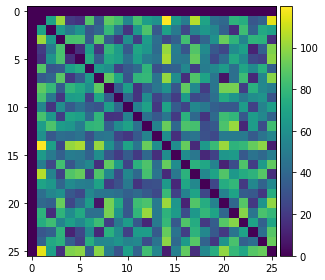

In [6]:
distance_matrix = cle.generate_distance_matrix(centroids, centroids)
imshow(cle.pull_zyx(distance_matrix))

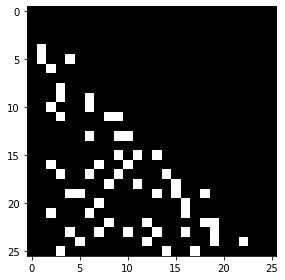

In [7]:
touch_matrix = cle.generate_touch_matrix(cells)
imshow(cle.pull_zyx(touch_matrix))

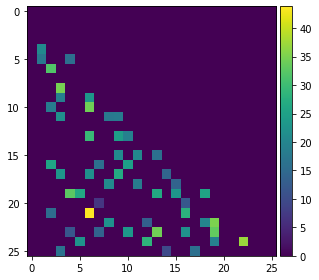

In [8]:
touch_distance_matrix = cle.multiply_images(touch_matrix, distance_matrix)
imshow(cle.pull_zyx(touch_distance_matrix))

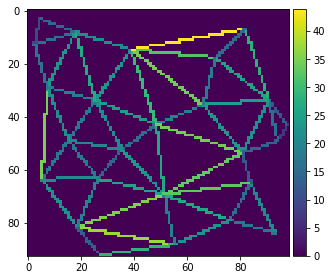

In [9]:
distance_mesh = cle.touch_matrix_to_mesh(centroids, touch_distance_matrix)
imshow(cle.pull_zyx(distance_mesh))

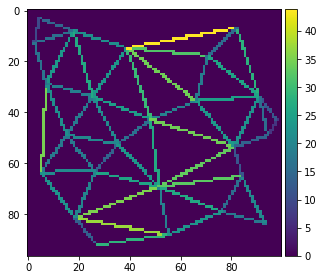

In [10]:
# or in short:
distance_mesh = cle.draw_distance_mesh_between_touching_labels(cells)
imshow(cle.pull_zyx(distance_mesh))